Тема курсового проекта.

Задача:
Существует массив заявленных менеджером попозиционных прогнозов продаж по продукции на n месяцев вперед. Необходимо создать систему, автоматически выделяющую позиции с "рисковым" прогнозом.

Предполагаемый метод решения:
На основе ретроспективных данных, используя модель регресси и модель среднего построить математический прогноз и прогнозный интервал для заданного уровня значимости в двух временных срезах:

- помесячный
- суммарный на плече поставки
Результат:
По позициям, выходящим за пределы доверительного интервала по обоим моделям, сформировать выгрузку содержащую инфорамцию с прогнозом менеджера и рассчитанными доверительными интервалами.

Прдполагается, что продажи не имеют сезонной компоненты.

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import t
import datetime
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
import time 

In [3]:
def mean_dov_interval(ar, alfa):
    cnt=len(ar)
    so=(np.var(ar,ddof=1))**(1/2)
    mo=np.mean(ar)
    c=t.ppf((1-alfa/2),cnt-1)
    t_low = mo - c*so
    t_high = mo + c*so
    return (np.array([t_low,t_high]))

In [16]:
def modeling(y,alfa, l):
    
    y.name='Продажи за период'
    
    y_train=y[:-l]
    y_test=y[-l:]
   
    di=mean_dov_interval(y_train,alfa)
    di_lr=lin_regr_dov_interval(y_train,y_test, alfa)
    
    plt.plot(y_train.index, y_train, 'r-')
    plt.plot(y_train.index, np.linspace(di[0],di[0],len(y_train)),'g-')
    plt.plot(y_train.index, np.linspace(di[1],di[1],len(y_train)), 'b-')
    
    plt.plot(y_test.index,y_test, 'ro-')
    plt.plot(y_test.index,np.linspace(di[0],di[0],l), 'go-')
    plt.plot(y_test.index,np.linspace(di[1],di[1],l), 'bo-')
    
    plt.grid()
    plt.show()  
    y_test=y_test.reset_index()
    y_test['di1']=di[0]
    y_test['di2']=di[1]
    print(y_test)
    return(y_test[(y_test['Продажи за период']<di[0]) | (y_test['Продажи за период']>di[1])])


40
624.9779808775177
1.3125267775925376
[1521.24040366 1528.24110572 1535.24180779 1542.24250985 1549.24321191
 1556.24391398 1563.24461604 1570.24531811]


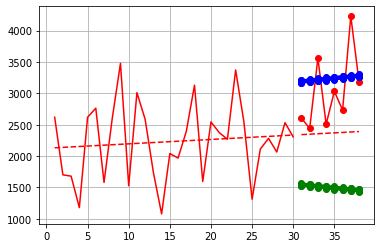

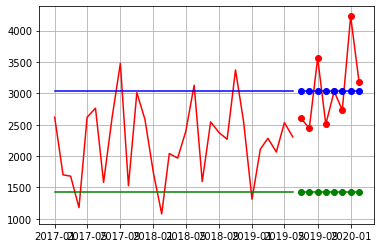

     d_month  Продажи за период          di1          di2
0 2019-07-01        2602.857143  1423.622553  3042.437161
1 2019-08-01        2442.003515  1423.622553  3042.437161
2 2019-09-01        3561.815336  1423.622553  3042.437161
3 2019-10-01        2507.659574  1423.622553  3042.437161
4 2019-11-01        3030.973451  1423.622553  3042.437161
5 2019-12-01        2733.075435  1423.622553  3042.437161
6 2020-01-01        4228.295820  1423.622553  3042.437161
7 2020-02-01        3184.559710  1423.622553  3042.437161
1195.1292558372925
1.3137029080232316
[13184.04943846 13245.83592196 13307.62240545]


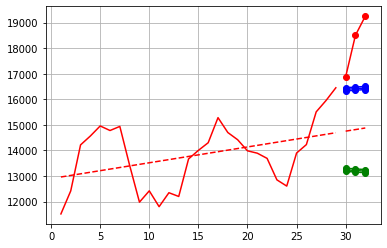

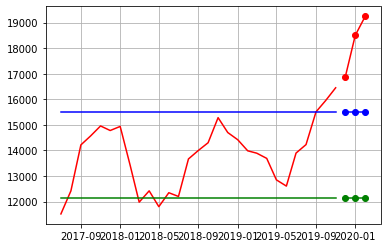

     d_month  Продажи за период           di1           di2
0 2019-12-01       16878.384455  12139.234542  15515.359388
1 2020-01-01       18503.823132  12139.234542  15515.359388
2 2020-02-01       19246.379328  12139.234542  15515.359388
54
398.69102938069176
1.3125267775925376
[618.27323633 620.90965058 623.54606483 626.18247908 628.81889332
 631.45530757 634.09172182 636.72813607]


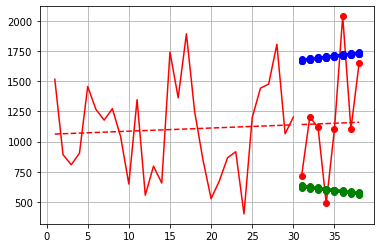

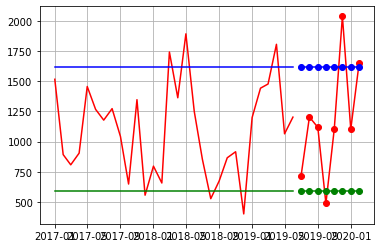

     d_month  Продажи за период         di1          di2
0 2019-07-01         713.627993  586.037653  1615.365282
1 2019-08-01        1204.028021  586.037653  1615.365282
2 2019-09-01        1118.683002  586.037653  1615.365282
3 2019-10-01         486.283186  586.037653  1615.365282
4 2019-11-01        1106.046065  586.037653  1615.365282
5 2019-12-01        2040.976059  586.037653  1615.365282
6 2020-01-01        1102.941176  586.037653  1615.365282
7 2020-02-01        1653.751654  586.037653  1615.365282
1034.6105755691146
1.3137029080232316
[5224.33456264 5230.456806   5236.57904937]


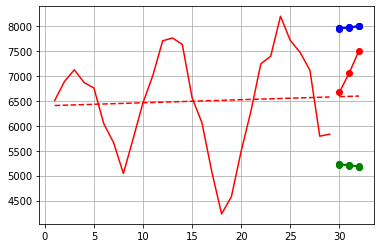

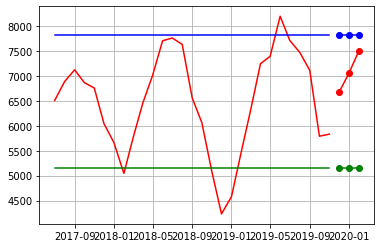

     d_month  Продажи за период          di1          di2
0 2019-12-01        6669.644325  5156.433223  7826.910445
1 2020-01-01        7058.957509  5156.433223  7826.910445
2 2020-02-01        7508.681142  5156.433223  7826.910445
56
1363.6209758434202
1.3125267775925376
[3968.49220634 3962.7140739  3956.93594146 3951.15780903 3945.37967659
 3939.60154415 3933.82341172 3928.04527928]


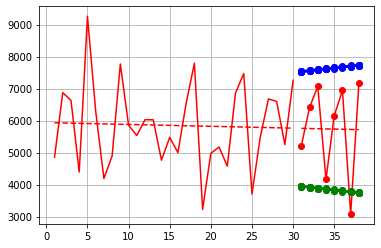

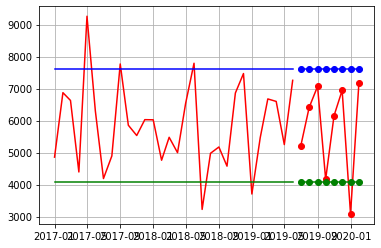

     d_month  Продажи за период        di1          di2
0 2019-07-01        5211.325967  4089.3813  7606.303309
1 2019-08-01        6412.434326  4089.3813  7606.303309
2 2019-09-01        7068.147014  4089.3813  7606.303309
3 2019-10-01        4165.044248  4089.3813  7606.303309
4 2019-11-01        6154.510557  4089.3813  7606.303309
5 2019-12-01        6944.290976  4089.3813  7606.303309
6 2020-01-01        3083.333333  4089.3813  7606.303309
7 2020-02-01        7174.447174  4089.3813  7606.303309
1881.2298049507287
1.3137029080232316
[32395.92057486 32394.03608228 32392.1515897 ]


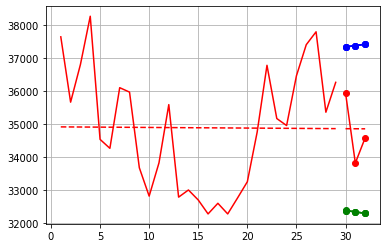

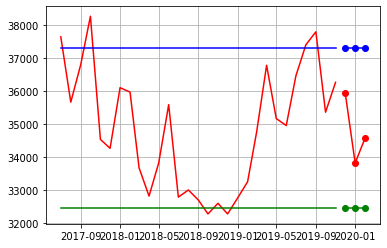

     d_month  Продажи за период           di1           di2
0 2019-12-01       35955.753087  32470.802165  37320.327893
1 2020-01-01       33827.760453  32470.802165  37320.327893
2 2020-02-01       34589.773302  32470.802165  37320.327893


In [84]:
df=pd.read_csv('data')
# print(df)
# for kod in df.кодноменклатуры.unique():
# t_prognoz - прогнозый период
t_prognoz=8
# plecho - плечо поставки, на котором необходимо проконтролировать суммарный прогноз
plecho=6

itog=pd.DataFrame()
for kod in (df.кодноменклатуры.unique())[:3]:
    print(kod)
    y=(df.loc[(df.кодноменклатуры==kod),['шт_дес','d_month']])
    y['d_month']=pd.to_datetime(y['d_month']) 
    y.index=y['d_month']
    y=y[0:38]
    
    y['y_accomulate']= y.rolling(plecho, min_periods=1).sum()
    
    df1_to_add=modeling(y['шт_дес'], 0.2, t_prognoz)    
    df1_to_add['код']=kod
    df1_to_add['тип периода']='месяц'
    
    df2_to_add=modeling(y.iloc[plecho:]['y_accomulate'], 0.2, t_prognoz-plecho+1)
    df2_to_add['код']=kod
    df2_to_add['тип периода']='плечо'

    itog=itog.append(df1_to_add)
    itog=itog.append(df2_to_add)
  
      


In [83]:
def lin_regr_dov_interval(y_train, y_test, alfa):
#     alfa - коэффициент ди
#     l - прогноза от ретроспективного периода
#     n - длина ретроспективного периода
#     Расширение границ доверительного интервала при линейном тренде
    lr=LinearRegression()
    n=len(y_train)
    
    x_train=np.linspace(1,len(y_train),len(y_train)).reshape(-1,1)
    x_test=np.linspace(len(y_train)+1,len(y_train)+len(y_test),len(y_test)).reshape(-1,1)

    lr.fit(x_train,y_train)
    
    y_train_model=lr.predict(x_train)
    y_test_model=lr.predict(x_test)
    
    sigma=np.sqrt(sum((y_train_model-y_train)**2)/(len(x_train)-2))
    print(sigma)
#     k=np.sqrt((n+l)/n+3*(n+2*l-1)/(n*(n**2-1)))
    c=t.ppf((1-alfa/2),len(y_train)-2)
    print(c)
    plt.plot(x_train, y_train, 'r-')
    plt.plot(x_train, y_train_model, 'r--')
#     plt.plot(y_train.index, np.linspace(di[0],di[0],len(y_train)),'g-')
#     plt.plot(y_train.index, np.linspace(di[1],di[1],len(y_train)), 'b-')
    
    plt.plot(x_test,y_test, 'ro-')
    plt.plot(x_test,y_test_model, 'r--')
    plt.plot(x_test,[y_test_model-c*sigma*np.sqrt((n+l)/n+3*(n+2*l-1)/(n*(n**2-1))) for l in range(len(y_test))], 'go-')
    plt.plot(x_test,[y_test_model+c*sigma*np.sqrt((n+l)/n+3*(n+2*l-1)/(n*(n**2-1))) for l in range(len(y_test))], 'bo-')
    
    print(y_test_model-c*sigma)
    
    plt.grid()
#     plt.title('Линейный тренд')
    plt.show()  
#     t_low = mo - c*so
#     t_high = mo + c*so
    return ()
    

In [75]:
plt.title?